# FPL 18 Figures

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## End-to-End Framework Evaluation

In [8]:
end2end = pd.read_csv('end2end.csv')
end2end

,model_name,accuracy,performance
0,VGG-16,0.9075,300.0


[0.9075]


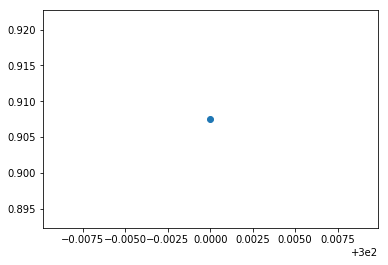

In [11]:
fig, ax = plt.subplots()
ax.scatter(end2end['performance'].tolist(), end2end['accuracy'].tolist())